In [1]:
import numpy as np
import netCDF4 as nc
import glob
import matplotlib.pyplot as plt
import re
import pandas as pd
from datetime import datetime, timedelta
import os

In [2]:
file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/troll/radar/'

file_list = sorted(glob.glob('/gws/nopw/j04/tone_ico_gws/cloudnet/troll/radar/2025*.nc'))  # Adjust path based on month


In [3]:
radar_accum = np.zeros([92])
daily_accum = {}

i = 0
for file in file_list:
    dset = nc.Dataset(file)

    dbz = np.array(dset.variables['Zh'][:, 0])
    dbz[dbz > 1000] = np.nan
    z = 10 ** (dbz / 10)

    a = 18
    b = 1.1

    precip = (z / a) ** (1 / b)

    basename = os.path.basename(file)
    date_str = basename.split('_')[0]
    base_time = datetime.strptime(date_str, '%Y%m%d')

    

    # Extract time (hours since midnight)
    time_var = dset.variables['time'][:]
    
    # Convert time to seconds
    time_sec = time_var * 3600  # NumPy array

    # Remove NaNs
    valid_mask = ~np.isnan(precip)
    precip_clean = precip[valid_mask]
    time_sec_clean = time_sec[valid_mask]

    accumulation = np.trapz(precip_clean, time_sec_clean) / 3600  # result in mm
    daily_accum[base_time.date()] = accumulation

    radar_accum[i] = accumulation
    i = i + 1


daily_series = pd.Series(daily_accum)
daily_series.index = pd.to_datetime(daily_series.index)
daily_series.name = 'snowfall_accumulation_mm'
daily_series.index.name = 'date'
#daily_series.to_csv('troll_radar_march_accum.csv')


/tmp/ipykernel_11172/1439118744.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  accumulation = np.trapz(precip_clean, time_sec_clean) / 3600  # result in mm


In [4]:
#file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230426_neumayer_mira.nc'
modfile_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/troll/era5/8c77d7d4c6e1d8b637bca6cfa6a85450.nc'
model = nc.Dataset(modfile_path)

# Coords of Neumayer III
minMod = np.array(model.variables['mntpr'][:, 48, 730]) * 60 * 60
maxMod = np.array(model.variables['mxtpr'][:, 48, 730]) * 60 * 60

In [8]:
print(model.variables['valid_time'][2208])
#1748736000

1748736000


In [9]:
eraUpperAccum = np.trapz(maxMod[:2208])
eraLowerAccum = np.trapz(minMod[:2208])

print(eraUpperAccum)
print(eraLowerAccum)

52.086353
45.36023


/tmp/ipykernel_11172/1706324909.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  eraUpperAccum = np.trapz(maxMod[:2208])
/tmp/ipykernel_11172/1706324909.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  eraLowerAccum = np.trapz(minMod[:2208])


In [10]:
accum_daily_low = np.sum(minMod[:2208].reshape(92, 24), axis=1)
accum_daily_high = np.sum(maxMod[:2208].reshape(92, 24), axis=1)


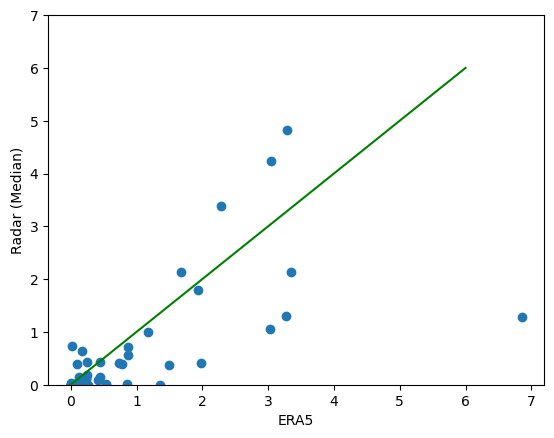

In [21]:
plt.scatter(accum_daily_low, radar_accum)
plt.xlabel("ERA5")
plt.ylabel("Radar (Median)")
plt.ylim(0, 7)
plt.plot(np.arange(0, 7), np.arange(0, 7), c='g')

In [13]:
radar_accum_upper = np.zeros([92])

i = 0
for file in file_list:
    dset = nc.Dataset(file)

    dbz = np.array(dset.variables['Zh'][:, 0])
    dbz[dbz > 1000] = np.nan
    z = 10 ** (dbz / 10)

    a = 43
    b = 1.1

    precip = (z / a) ** (1 / b)

    basename = os.path.basename(file)
    date_str = basename.split('_')[0]
    base_time = datetime.strptime(date_str, '%Y%m%d')

    

    # Extract time (hours since midnight)
    time_var = dset.variables['time'][:]
    
    # Convert time to seconds
    time_sec = time_var * 3600  # NumPy array

    # Remove NaNs
    valid_mask = ~np.isnan(precip)
    precip_clean = precip[valid_mask]
    time_sec_clean = time_sec[valid_mask]

    accumulation = np.trapz(precip_clean, time_sec_clean) / 3600  # result in mm

    radar_accum_upper[i] = accumulation
    i = i + 1





/tmp/ipykernel_11172/2152701335.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  accumulation = np.trapz(precip_clean, time_sec_clean) / 3600  # result in mm


In [14]:
radar_accum_lower = np.zeros([92])

i = 0
for file in file_list:
    dset = nc.Dataset(file)

    dbz = np.array(dset.variables['Zh'][:, 0])
    dbz[dbz > 1000] = np.nan
    z = 10 ** (dbz / 10)

    a = 11
    b = 1.1

    precip = (z / a) ** (1 / b)

    basename = os.path.basename(file)
    date_str = basename.split('_')[0]
    base_time = datetime.strptime(date_str, '%Y%m%d')

    

    # Extract time (hours since midnight)
    time_var = dset.variables['time'][:]
    
    # Convert time to seconds
    time_sec = time_var * 3600  # NumPy array

    # Remove NaNs
    valid_mask = ~np.isnan(precip)
    precip_clean = precip[valid_mask]
    time_sec_clean = time_sec[valid_mask]

    accumulation = np.trapz(precip_clean, time_sec_clean) / 3600  # result in mm

    radar_accum_lower[i] = accumulation
    i = i + 1





/tmp/ipykernel_11172/3239681642.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  accumulation = np.trapz(precip_clean, time_sec_clean) / 3600  # result in mm


In [15]:
print(np.sum(radar_accum_lower))
print(np.sum(radar_accum_upper))


46.58063266632536
13.488220789457554


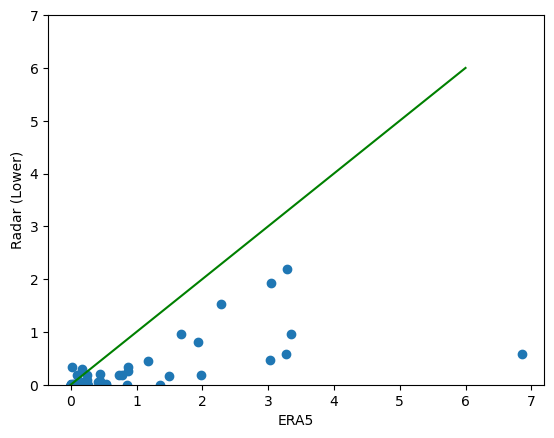

In [20]:
plt.scatter(accum_daily_low, radar_accum_upper)
plt.xlabel("ERA5")
plt.ylabel("Radar (Lower)")
plt.ylim(0, 7)
plt.plot(np.arange(0, 7), np.arange(0, 7), c='g')

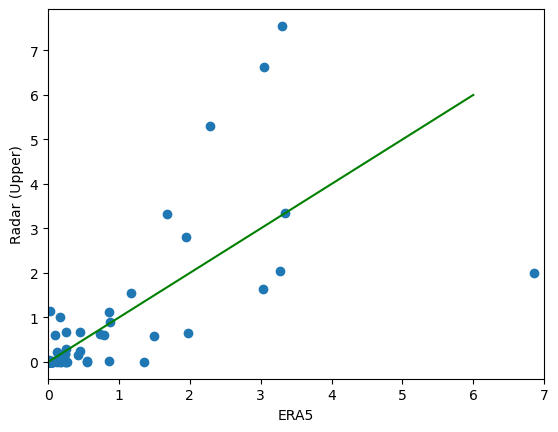

In [17]:
plt.scatter(accum_daily_low, radar_accum_lower)
plt.xlabel("ERA5")
plt.ylabel("Radar (Upper)")
plt.xlim(0, 7)
plt.plot(np.arange(0, 7), np.arange(0, 7), c='g')

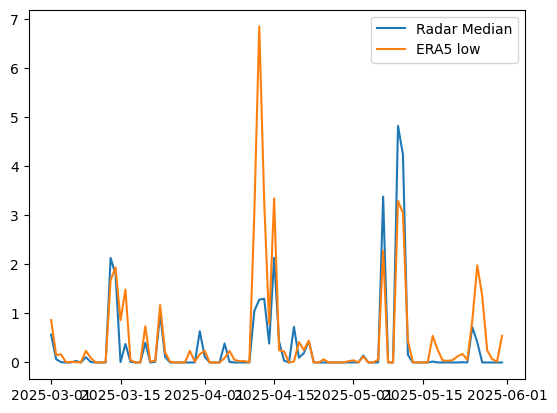

In [22]:
dates = np.arange('2025-03-01', '2025-06-01', dtype='datetime64[D]')

plt.plot(dates, radar_accum, label='Radar Median')
plt.plot(dates, accum_daily_low, label='ERA5 low')
#plt.plot(dates, accum_daily_high, label='ERA5 high')
plt.legend()

In [24]:
print("Radar accumulation = " + str(np.sum(radar_accum)) + " mm")
print("Radar lower accumulation = " + str(np.sum(radar_accum_upper)) + " mm")
print("Radar upper accumulation = " + str(np.sum(radar_accum_lower)) + " mm")
print("ERA5 lower accumulation = " + str(np.sum(accum_daily_low)) + " mm")
print("ERA5 upper accumulation = " + str(np.sum(accum_daily_high)) + " mm")

Radar accumulation = 29.769337953062596 mm
Radar lower accumulation = 13.488220789457554 mm
Radar upper accumulation = 46.58063266632536 mm
ERA5 lower accumulation = 45.501 mm
ERA5 upper accumulation = 52.244278 mm
